# 必要步驟！告訴 python 你的標的股票是什麼
##### stock = yf.Ticker('股票代碼')
##### 取得各種資料
##### stock.info # 取得公司資料
##### stock.financials # 取得損益表
##### stock.balance_sheet # 取得資產負債表
##### stock.cashflow # 取得現金流量表
##### stock.history # 取得價量資料＋股利發放資料＋股票分割資料
##### import yfinance as yfin
##### yfin.download(代碼, 開始時間, 結束時間)
##### 台股代碼：上市股票需加上 ".tw"，上櫃股票需加上 “.two”
##### df = yfin.download(["2330.tw","GOOG","NVDA"], "2024-01-01")

In [16]:
import yfinance as yf

# Downloading the ticker data
ticker = yf.Ticker("V")

# Getting the quarterly balance sheet, financials, and cashflow
qbs = ticker.quarterly_balance_sheet
qf = ticker.quarterly_financials
qcf = ticker.quarterly_cashflow

# Select data for a specific date, e.g., '2023-09-30'
qbs_sept = qbs['2024-06-30']
qf_sept = qf['2024-06-30']
qcf_sept = qcf['2024-06-30']

### rebase 股價繪圖 #'^DJI', '^TWII','^HSI','^N225','^STI'

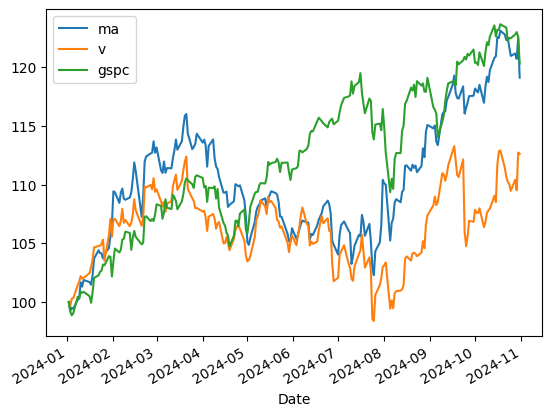

In [14]:
import ffn 
import matplotlib.pyplot as plt

# 取得股票價格數據
prices = ffn.get(['MA', 'V', '^GSPC'], start='2024-01-01')

# 繪圖並儲存為 PNG 圖片
prices.rebase().plot()
plt.savefig('prices_chart.png', format='png')  # 儲存圖片為 PNG 格式
plt.show()  # 顯示圖片

In [3]:
import yfinance as yf
import pandas as pd

# 創建 Ticker 對象（以 AAPL 為例）
ticker = yf.Ticker("GGR")

# 取得最近一年的季度財務報表
quarterly_f = ticker.quarterly_financials
#print(quarterly_f)

#quarterly_CF = ticker.quarterly_cashflow
#print(quarterly_CF)

# 確保收入報表存在，並選擇項目 "Total Revenue", "Gross Profit", "Net Income", "Diluted EPS"
selected_items = ["Total Revenue", "Gross Profit", "Net Income", "Diluted EPS"]
df_income = quarterly_f.loc[selected_items].T  # 轉置以便日期作為索引

# 將日期從小到大排序
df_income_sorted = df_income.sort_index(ascending=True)

# 新增最新一季數據，將其加入 DataFrame
new_data = pd.Series({"Total Revenue": 7369000000.0, "Gross Profit": 000000.0,
                      "Net Income": 3263000000, "Diluted EPS": 3.89},
                     name=pd.to_datetime("2024-09-30"))
df_income_sorted = pd.concat([df_income_sorted, new_data.to_frame().T])

# 計算毛利率
#df_income_sorted['Gross Profit Margin'] = (df_income_sorted['Gross Profit'] / df_income_sorted['Total Revenue']) * 100

# 計算季增 (QoQ) 和年增 (YoY)
df_income_sorted['RQoQ'] = (df_income_sorted["Total Revenue"] / df_income_sorted["Total Revenue"].shift(1) - 1) * 100
df_income_sorted['RYoY'] = (df_income_sorted["Total Revenue"] / df_income_sorted["Total Revenue"].shift(4) - 1) * 100
df_income_sorted['GQoQ'] = (df_income_sorted["Gross Profit"] / df_income_sorted["Gross Profit"].shift(1) - 1) * 100
df_income_sorted['GYoY'] = (df_income_sorted["Gross Profit"] / df_income_sorted["Gross Profit"].shift(4) - 1) * 100
df_income_sorted['IQoQ'] = (df_income_sorted["Net Income"] / df_income_sorted["Net Income"].shift(1) - 1) * 100
df_income_sorted['IYoY'] = (df_income_sorted["Net Income"] / df_income_sorted["Net Income"].shift(4) - 1) * 100
df_income_sorted['DQoQ'] = (df_income_sorted["Diluted EPS"] / df_income_sorted["Diluted EPS"].shift(1) - 1) * 100
df_income_sorted['DYoY'] = (df_income_sorted["Diluted EPS"] / df_income_sorted["Diluted EPS"].shift(4) - 1) * 100


print(df_income_sorted)

# 顯示多種分析師預測
print("股價目標:\n", ticker.analyst_price_targets)
print("獲利預測:\n", ticker.earnings_estimate)
print("成長預測:\n", ticker.growth_estimates)
print("收益日期:\n", ticker.earnings_dates)

           Total Revenue Gross Profit    Net Income Diluted EPS         RQoQ  \
2023-03-31           NaN          NaN           NaN         NaN          NaN   
2023-06-30    87247000.0   13300000.0    -5624000.0       -0.02          NaN   
2023-09-30    91750000.0   16783000.0    -3088000.0       -0.01     5.161209   
2023-12-31    91530000.0   10595000.0   -26706000.0       -0.12    -0.239782   
2024-03-31    69711000.0    4473000.0   -13127000.0       -0.06   -23.838086   
2024-06-30    80944000.0    4172000.0   -20055000.0       -0.08    16.113669   
2024-09-30  7369000000.0          0.0  3263000000.0        3.89  9003.824867   

                   RYoY       GQoQ       GYoY          IQoQ           IYoY  \
2023-03-31          NaN        NaN        NaN           NaN            NaN   
2023-06-30          NaN        NaN        NaN           NaN            NaN   
2023-09-30          NaN   26.18797        NaN    -45.092461            NaN   
2023-12-31          NaN -36.870643        NaN  

In [23]:
import yfinance as yfin
import pandas as pd
# yfin.download(代碼, 開始時間, 結束時間)
# 台股代碼：上市股票需加上 ".tw"，上櫃股票需加上 “.two”
df =  yfin.Ticker('V')
Data = df.analyst_price_targets #分析師目標價
Data

{'current': 281.88,
 'low': 251.0,
 'high': 340.0,
 'mean': 311.01,
 'median': 319.0}

In [18]:
# 獲取 EPS 修正預測
import yfinance as yfin
ticker = yfin.Ticker('V')
eps_revisions = ticker.eps_revisions
df = pd.DataFrame(eps_revisions)
df

,upLast7days,upLast30days,downLast7days,downLast30days
0q,2,6,None,0
+1q,0,5,None,0
0y,3,8,None,0
+1y,0,6,None,1


In [24]:
# 獲取分析師對未來收益的預測
earnings_estimate = ticker.earnings_estimate
print("分析師獲利預測:")
df = pd.DataFrame(earnings_estimate)
df

分析師獲利預測:


,numberOfAnalysts,avg,low,high,yearAgoEps,growth
0q,31,1.07,1.04,1.15,1.30,-0.177
+1q,31,1.10,1.03,1.19,1.38,-0.203
0y,36,4.46,4.35,5.10,4.76,-0.063
+1y,37,4.88,4.42,5.84,4.46,0.094


In [20]:
# 獲取分析師成長預測
growth_estimates = ticker.growth_estimates
print("成長預測:")
df = pd.DataFrame(growth_estimates)
df

成長預測:


,stock,industry,sector,index
0q,0.21100,NaN,NaN,0.043000
+1q,0.12000,NaN,NaN,0.096000
0y,0.24000,NaN,NaN,0.020000
+1y,0.11700,NaN,NaN,0.128000
+5y,0.12630,NaN,NaN,0.117761
-5y,0.16201,NaN,NaN,NaN


In [25]:
# 獲取即將發布收益的日期
earnings_dates = ticker.earnings_dates
print("即將公佈的收益日期:")
print(earnings_dates)

即將公佈的收益日期:
                           EPS Estimate  Reported EPS  Surprise(%)
Earnings Date                                                     
2025-07-28 08:00:00-04:00           NaN           NaN          NaN
2025-04-28 11:00:00-04:00           NaN           NaN          NaN
2025-02-05 05:00:00-05:00           NaN           NaN          NaN
2024-10-29 08:00:00-04:00          1.07           NaN          NaN
2024-07-30 07:00:00-04:00          0.99          1.19       0.2062
2024-04-30 07:00:00-04:00          1.22          1.40       0.1510
2024-02-07 16:00:00-05:00          1.36          1.48       0.0858
2023-11-01 16:00:00-04:00          1.23          1.30       0.0586
2023-08-02 16:00:00-04:00          1.16          1.16      -0.0029
2023-05-08 16:00:00-04:00          1.10          1.17       0.0656
2023-02-09 16:00:00-05:00          1.20          1.24       0.0338
2022-11-03 16:00:00-04:00          0.96          1.08       0.1271


In [7]:
# 創建 Ticker 對象
ticker = yf.Ticker("MA")

# 獲取營收預測和 EPS 預測
revenue_estimate = ticker.revenue_estimate
earnings_estimate = ticker.earnings_estimate

# 將數據轉換為 DataFrame
revenue_df = pd.DataFrame(revenue_estimate)
earnings_df = pd.DataFrame(earnings_estimate)

# 合併兩個數據框
combined_df = pd.concat([revenue_df, earnings_df], axis=1, keys=["Revenue Estimate", "Earnings Estimate"])

# 重命名索引
combined_df = combined_df.rename(index={
    "0q": "本季",
    "+1q": "下季",
    "0y": "今年",
    "+1y": "明年"
})
combined_df

Revenue Estimate                                                        \
   numberOfAnalysts          avg          low         high yearAgoRevenue   
本季               24   7269580000   7204480000   7361760000     5958750000   
下季               24   7395080000   7299980000   7663000000     6548000000   
今年               35  27979200000  27843600000  28206900000    25098000000   
明年               34  31392400000  30899000000  32216000000    27979200000   

          Earnings Estimate                                         
   growth  numberOfAnalysts    avg    low   high yearAgoEps growth  
本季  0.220                27   3.74   3.64   3.82       3.09  0.210  
下季  0.129                27   3.69   3.55   3.95       3.18  0.160  
今年  0.115                35  14.33  14.18  14.65      12.26  0.169  
明年  0.122                35  16.67  15.93  17.35      14.33  0.163

In [1]:
import yfinance as yfin
# yfin.download(代碼, 開始時間, 結束時間)
# 台股代碼：上市股票需加上 ".tw"，上櫃股票需加上 “.two”
df = stock = yfin.Ticker('2885.tw')
Data = df.actions #股利、股票分割
eps_data = stock.financials.loc['Earnings Per Share']
eps_data

KeyError: 'Earnings Per Share'

In [19]:
import yfinance as yfin
# yfin.download(代碼, 開始時間, 結束時間)
# 台股代碼：上市股票需加上 ".tw"，上櫃股票需加上 “.two”
df = stock = yfin.Ticker('2888.tw')

# 查詢該公司的主要股東
major_holders = df.major_holders
print(major_holders) #內部人持股比例

# 查詢機構持有人資料
institutional_holders = df.institutional_holders
print(institutional_holders) 機構持有者數量

Breakdown                         Value
insidersPercentHeld             0.14347
institutionsPercentHeld         0.09731
institutionsFloatPercentHeld    0.11361
institutionsCount             122.00000
Empty DataFrame
Columns: []
Index: []


In [7]:
import yfinance as yfin
import Pandas as pd

# yfin.download(代碼, 開始時間, 結束時間)
# 台股代碼：上市股票需加上 ".tw"，上櫃股票需加上 “.two”
df = stock = yfin.Ticker('2330.tw')

# 查詢公司即將舉行的事件（如財報發布日）
calendar = df.calendar
pd.DataFrame(calendar)

ModuleNotFoundError: No module named 'Pandas'

In [6]:
import yfinance as yf
import pandas as pd

apple = yf.Ticker('2330.tw')
news = apple.get_news()
df = pd.DataFrame(news)
df.iloc(:2:)

,uuid,title,publisher,link,providerPublishTime,type,thumbnail,relatedTickers
0,8bfa65c3-bd0c-32e0-aceb-a5c31ecbd09d,"MicroVision, Inc. (MVIS): Among The Best Augme...",Insider Monkey,https://finance.yahoo.com/news/microvision-inc...,1729494533,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,[MVIS]
1,9a4bed43-8911-3e3d-867c-16e02a905918,Sabre Corporation (SABR): Among The Best Augme...,Insider Monkey,https://finance.yahoo.com/news/sabre-corporati...,1729494452,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,[SABR]
2,7c4b043c-6f25-3817-a7ee-61608b2adc01,/C O R R E C T I O N -- SolaX Power/,PR Newswire,https://finance.yahoo.com/news/c-o-r-r-e-07060...,1729494360,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,NaN
3,6f2c89fc-eab6-3d8b-924e-a6db34530899,Conduent Incorporated (CNDT): Among The Best A...,Insider Monkey,https://finance.yahoo.com/news/conduent-incorp...,1729494358,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,[CNDT]
4,0934c14c-b028-3568-a4b4-9cdfa865b2fb,Rob Atherton Joins Melbourne Capital Group as ...,PR Newswire,https://finance.yahoo.com/news/rob-atherton-jo...,1729494300,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,NaN
5,cb184b76-54db-31f0-a674-0246e6eab9f1,Arcadis reports transactions under its current...,GlobeNewswire,https://finance.yahoo.com/news/arcadis-reports...,1729494300,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,"[ARCAY, ARCVF]"
6,d5fbdef1-77f4-340e-a475-f24d178214fa,Perfect Corp. (PERF): Among The Best Augmented...,Insider Monkey,https://finance.yahoo.com/news/perfect-corp-pe...,1729494277,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,[PERF-WS]
7,094efa66-69cb-31fa-8e27-126c9b92b83c,Soverin Celebrates 10 Years of Safeguarding Pr...,PR Newswire,https://finance.yahoo.com/news/soverin-celebra...,1729494000,STORY,{'resolutions': [{'url': 'https://s.yimg.com/u...,NaN


In [7]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    cache
    const
    data
    exceptions
    multi
    scrapers (package)
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builti